# inspect single model


In [2]:
import os
from sklearn.metrics import adjusted_rand_score
from matplotlib import pyplot as plt
from scipy.special import softmax
from itertools import product
import numpy as np
from utils import *
from model import *
import time
import seaborn as sns
sns.set_context('talk')

%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
## load human data
hdf_split = pd.read_csv('../human_data_split_tstep.csv')
hB1,hB2,hI1,hI2 = hdf_split.loc[:,(
  'blocked-step1','blocked-step2',
  'interleaved-step1','interleaved-step2')
].values.T

gs0317-0-mse0.047-acc-
concentration_1.525-
stickiness_wi_1.084-
stickiness_bt_1.084-
sparsity_0.153

gs0317-1-mse0.051-acc-
concentration_1.500-
stickiness_wi_1.375-
stickiness_bt_1.375-
sparsity_0.112

In [4]:
schargs0 = {
   'concentration':1.525,
   'stickiness_wi':1.084,
   'stickiness_bt':1.084,
   'sparsity':0.153,
#   fixed
   'pvar': 0,
   'lrate':1,
   'lratep':1,
   'decay_rate':1,
}

schargs1 = {
   'concentration':1.500,
   'stickiness_wi':1.375,
   'stickiness_bt':1.375,
   'sparsity':0.112,
#   fixed
   'pvar': 0,
   'lrate':1,
   'lratep':1,
   'decay_rate':1,
}

In [5]:
schargs = schargs1
semargs = {
  'beta2':False,
  'skipt1':True,
  'ppd_allsch':False
}

taskargs = {
  'condition':'blocked',
  'n_train':160,
  'n_test':40
}
args = {
    'sem':semargs,
    'sch':schargs,
    'exp':taskargs
}

In [6]:
param_str = "-".join(["%s_%.3f"%(i,j) for i,j in schargs.items()])
param_str += "-"+"-".join(["%s_%.3f"%(i,j) for i,j in semargs.items()])
param_str

'concentration_1.500-stickiness_wi_1.375-stickiness_bt_1.375-sparsity_0.112-pvar_0.000-lrate_1.000-lratep_1.000-decay_rate_1.000-beta2_0.000-skipt1_1.000-ppd_allsch_0.000'

### main

In [7]:
ns = 150
L = []
condL = ['blocked','interleaved',
         'early','middle','late'
        ]
exp_batch_data = run_batch_exp_curr(ns,args,condL) # [curr,seeds,{data}]


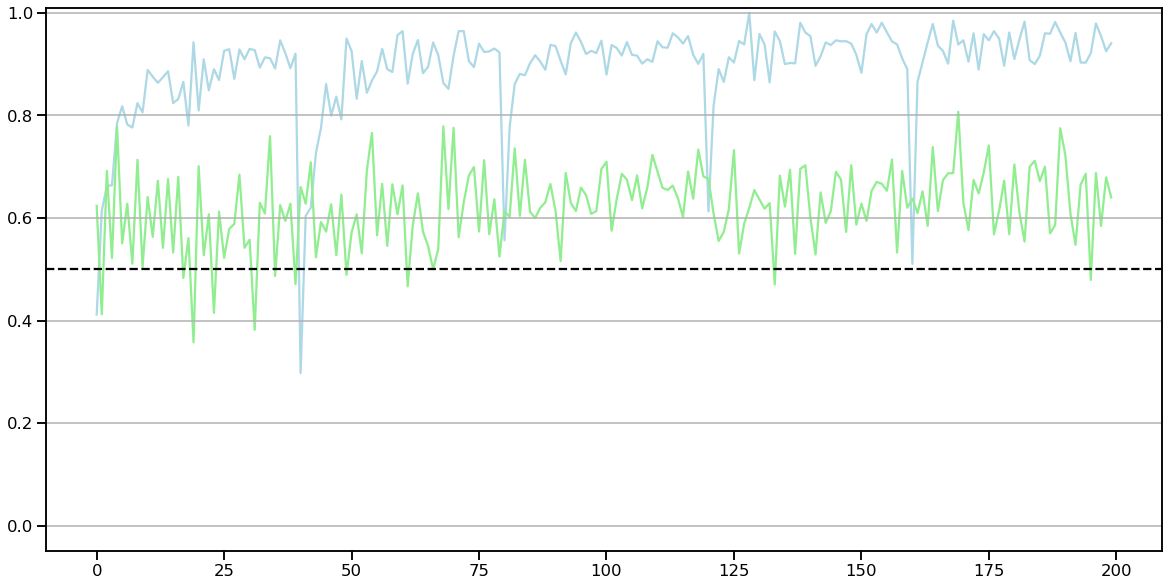

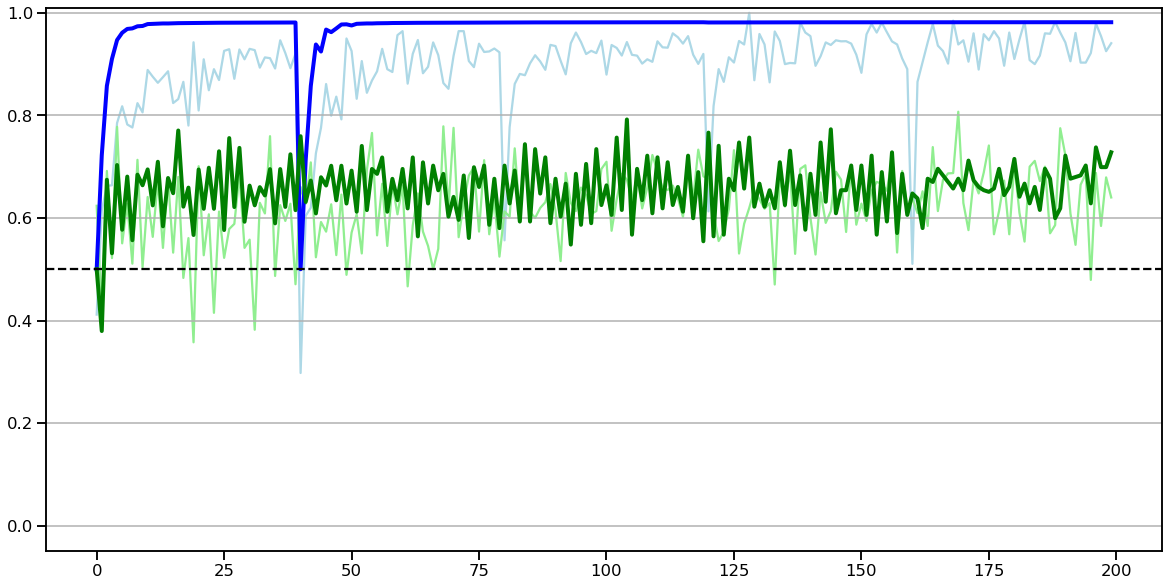

In [11]:
## BI accuracy plot
def plt_acc(exp_batch_data,human_only=False):
  ## process data
  batch_acc = unpack_acc(exp_batch_data,False) # curr,seeds,tsteps,trials
  mean_acc = batch_acc.mean(1) # over seeds
  test_acc = mean_acc[:,-40:].mean(1) # curr  
  mean_acc.shape # cond,step,trial

  ### plot
  f,axar=plt.subplots(1,1,figsize=(20,10),sharex=True)
  ax=axar
  for cidx in range(2):
    if not human_only:
      ## plot model
      ax.plot(mean_acc.mean(1)[cidx,:],label=condL[cidx],
              c=['blue','green'][cidx],lw=4,alpha=2
      )
    ## plot human
    ax.plot([(hB1+hB2)/2,(hI1+hI2)/2][cidx],
            c=['lightblue','lightgreen'][cidx],zorder=0
    )
  ax.axhline(0.5,c='k',ls='--')
  ax.set_ylim(-0.05,1.01)
  ax.grid(True,axis='y')
  plt.savefig("figures/pdp2022/BI-acc-human_only%s-%s.png"%(human_only,param_str))
  
plt_acc(exp_batch_data,True)
plt_acc(exp_batch_data,False)

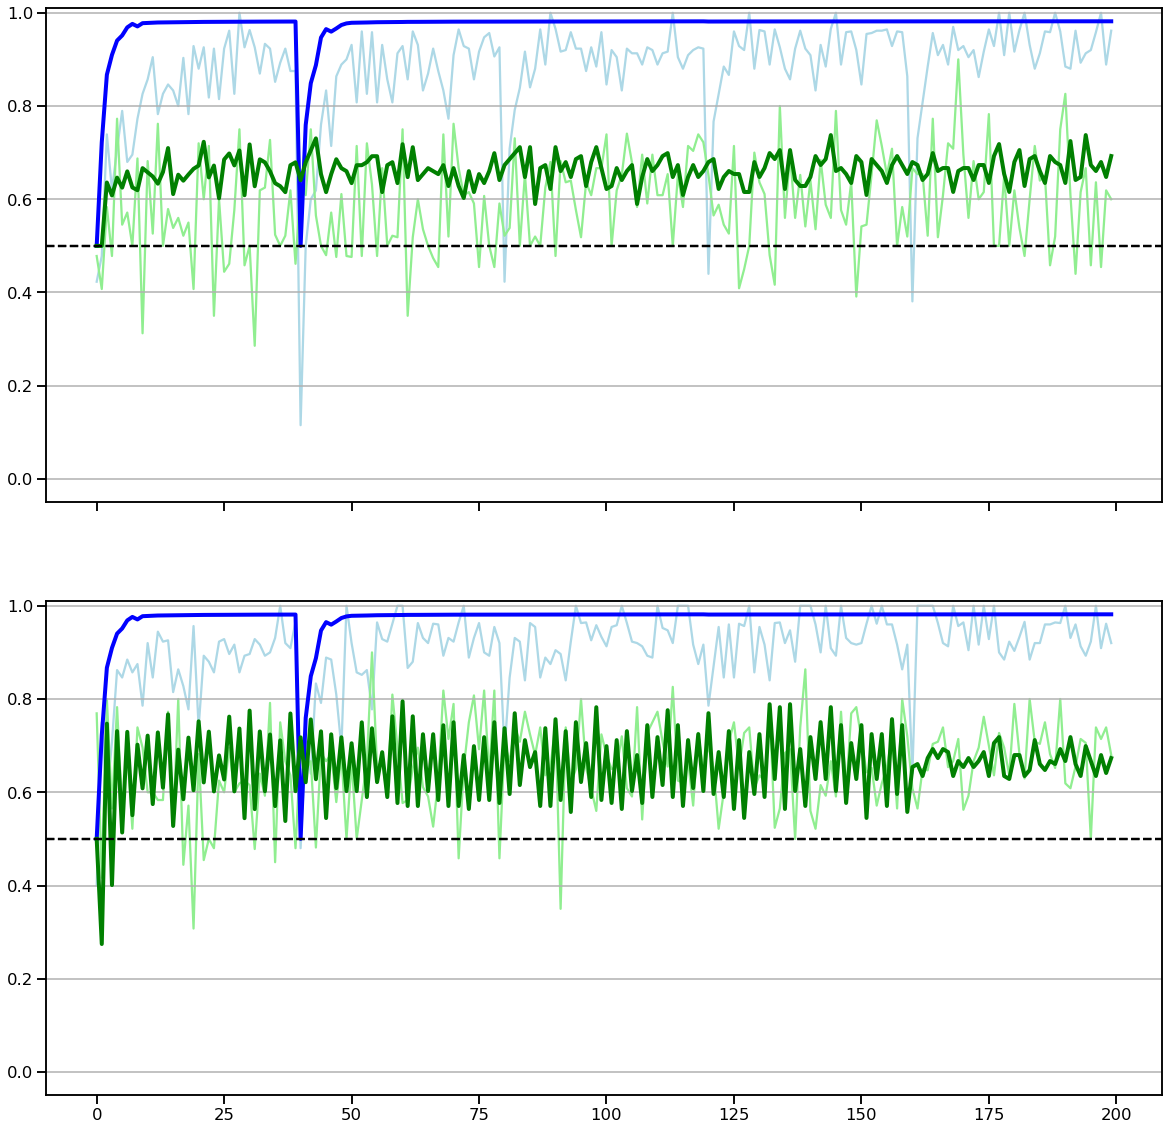

In [7]:
## BI accuracy plot
def plt_accbystep(exp_batch_data):
  ## process data
  batch_acc = unpack_acc(exp_batch_data,False) # curr,seeds,tsteps,trials
  mean_acc = batch_acc.mean(1) # over seeds
  test_acc = mean_acc[:,-40:].mean(1) # curr  
  mean_acc.shape # cond,step,trial
  
  ### plot
  f,axar=plt.subplots(2,1,figsize=(20,20),sharex=True)
  for cidx in range(2):
    for tidx in range(2):
      ax = axar[tidx]
      ## plot model
      ax.plot(mean_acc[cidx,tidx,:],label=condL[cidx],
              c=['blue','green'][cidx],lw=4,alpha=2)
      ## plot human
      ax.plot([[hB1,hB2],[hI1,hI2]][cidx][tidx],
              c=['lightblue','lightgreen'][cidx],zorder=0)
      #
      ax.axhline(0.5,c='k',ls='--')
      ax.set_ylim(-0.05,1.01)
      ax.grid(True,axis='y')
  plt.savefig("figures/pdp2022/BI-accbystep-%s.png"%param_str)
  
plt_accbystep(exp_batch_data)

# EML

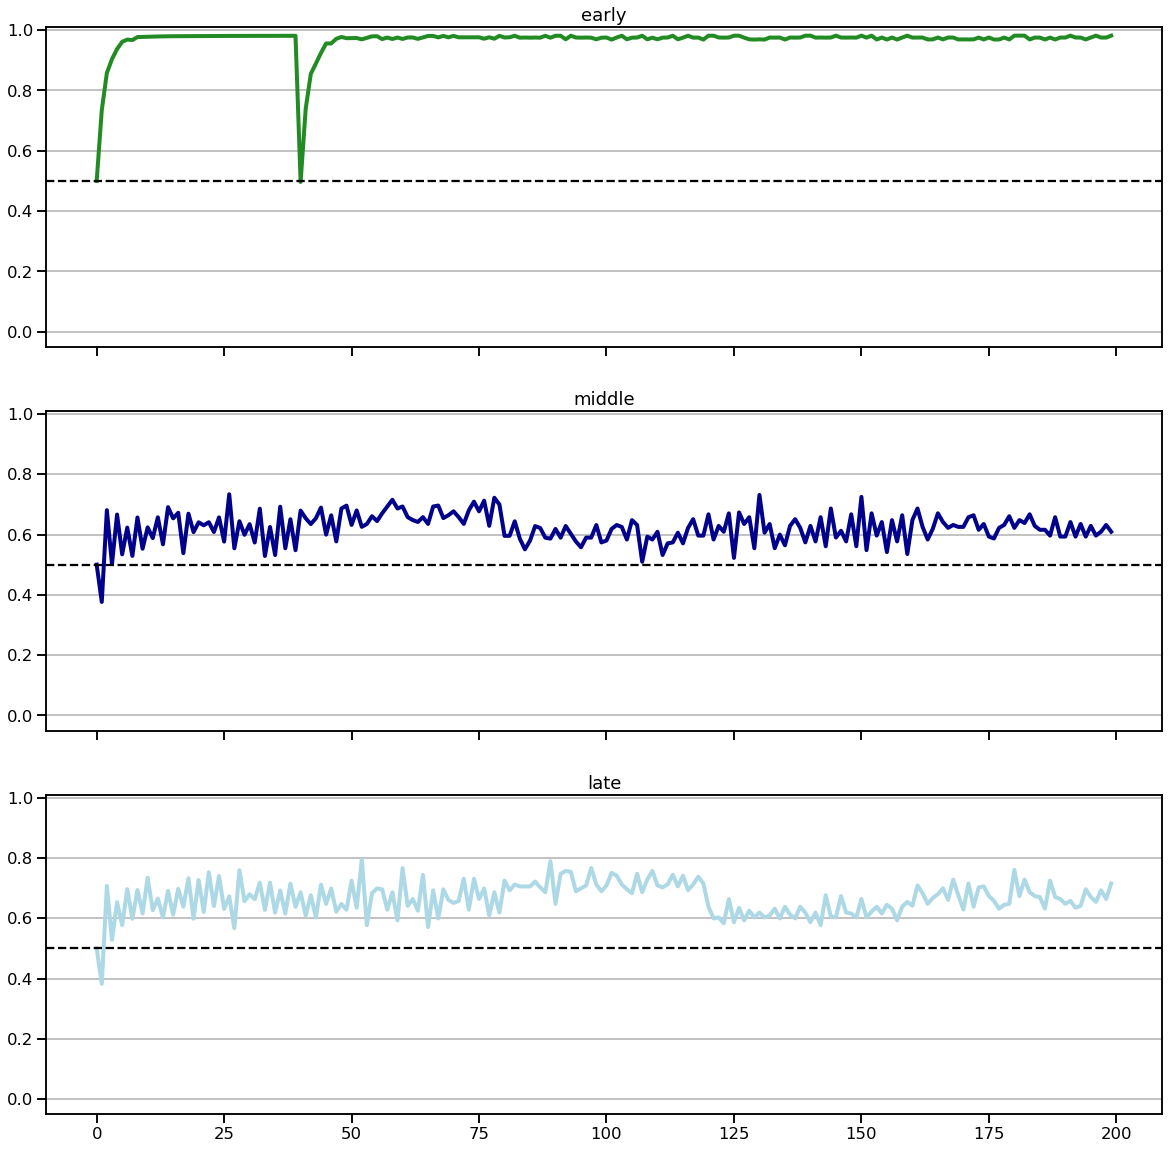

In [14]:
## BI accuracy plot
def plt_accEML(exp_batch_data):
  ## process data
  batch_acc = unpack_acc(exp_batch_data,False) # curr,seeds,tsteps,trials
  mean_acc = batch_acc.mean((1,2)) # over seeds
#   test_acc = mean_acc[:,-40:].mean((1,2)) # curr  
  mean_acc.shape # cond,step,trial
  
  ### plot
  f,axar=plt.subplots(3,1,figsize=(20,20),sharex=True)
  for cidx in range(2,5):
    ax = axar[cidx-2]
    ax.set_title(['early','middle','late'][cidx-2])
    ## plot model
    ax.plot(mean_acc[cidx,:],label=condL[cidx],
            c=['forestgreen','darkblue','lightblue'][cidx-2],lw=4,alpha=2
    )
    ax.axhline(0.5,c='k',ls='--')
    ax.set_ylim(-0.05,1.01)
    ax.grid(True,axis='y')
  plt.savefig("figures/pdp2022/EML-acc-%s.png"%param_str)
  
plt_accEML(exp_batch_data)

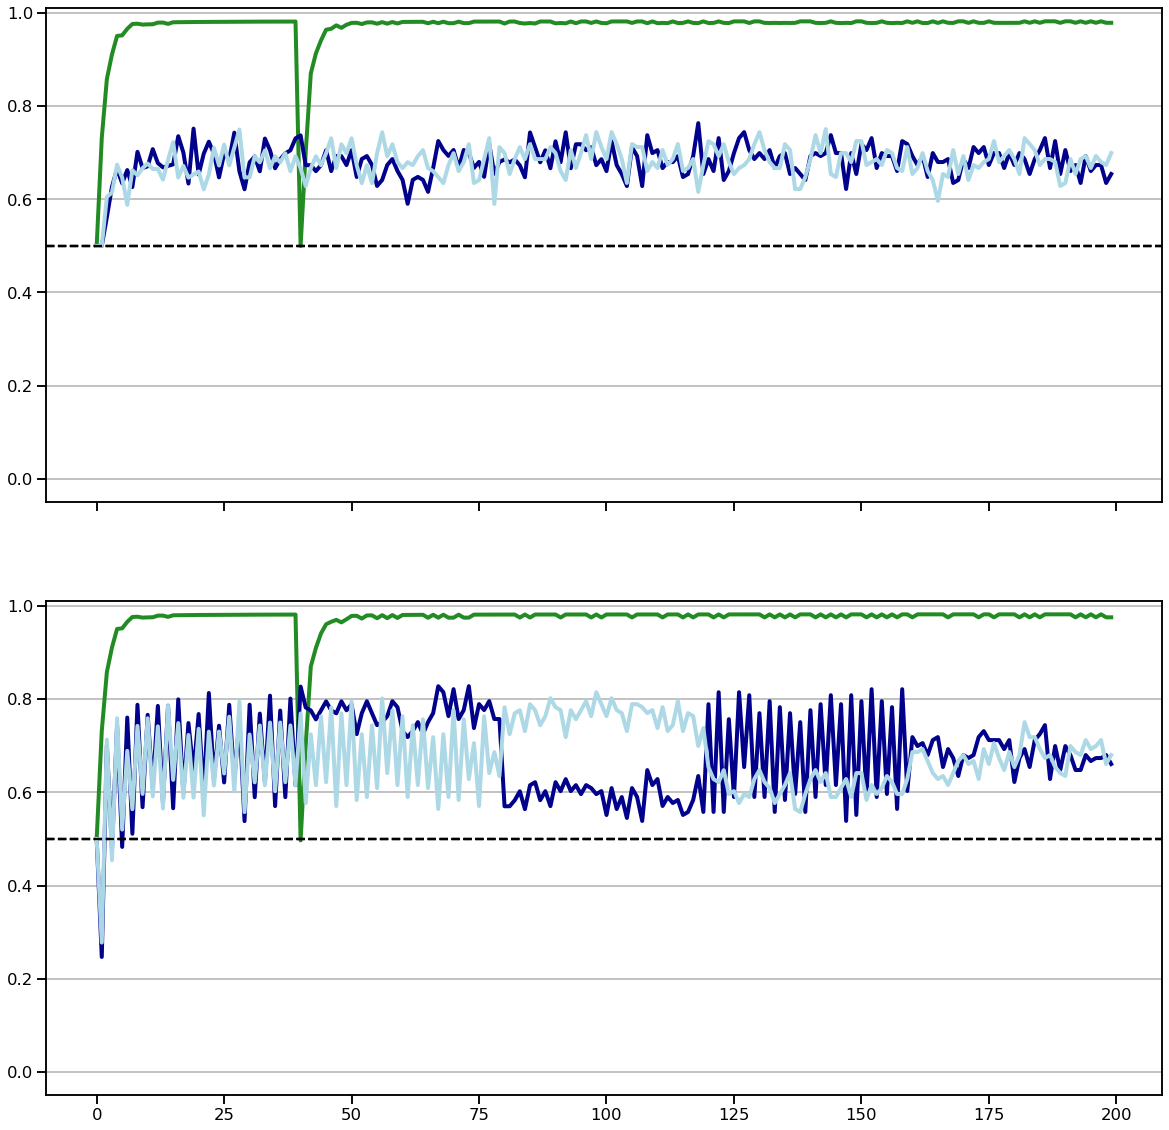

In [8]:
## BI accuracy plot
def plt_accbystep(exp_batch_data):
  ## process data
  batch_acc = unpack_acc(exp_batch_data,False) # curr,seeds,tsteps,trials
  mean_acc = batch_acc.mean(1) # over seeds
  test_acc = mean_acc[:,-40:].mean(1) # curr  
  mean_acc.shape # cond,step,trial
  
  ### plot
  f,axar=plt.subplots(2,1,figsize=(20,20),sharex=True)
  for cidx in range(2,5):
    for tidx in range(2):
      ax = axar[tidx]
      ## plot model
      ax.plot(mean_acc[cidx,tidx,:],label=condL[cidx],
              c=['forestgreen','darkblue','lightblue'][cidx-2],lw=4,alpha=2)
      ax.axhline(0.5,c='k',ls='--')
      ax.set_ylim(-0.05,1.01)
      ax.grid(True,axis='y')
  plt.savefig("figures/pdp2022/EML-accbystep-%s.png"%param_str)
  
plt_accbystep(exp_batch_data)

## sch count

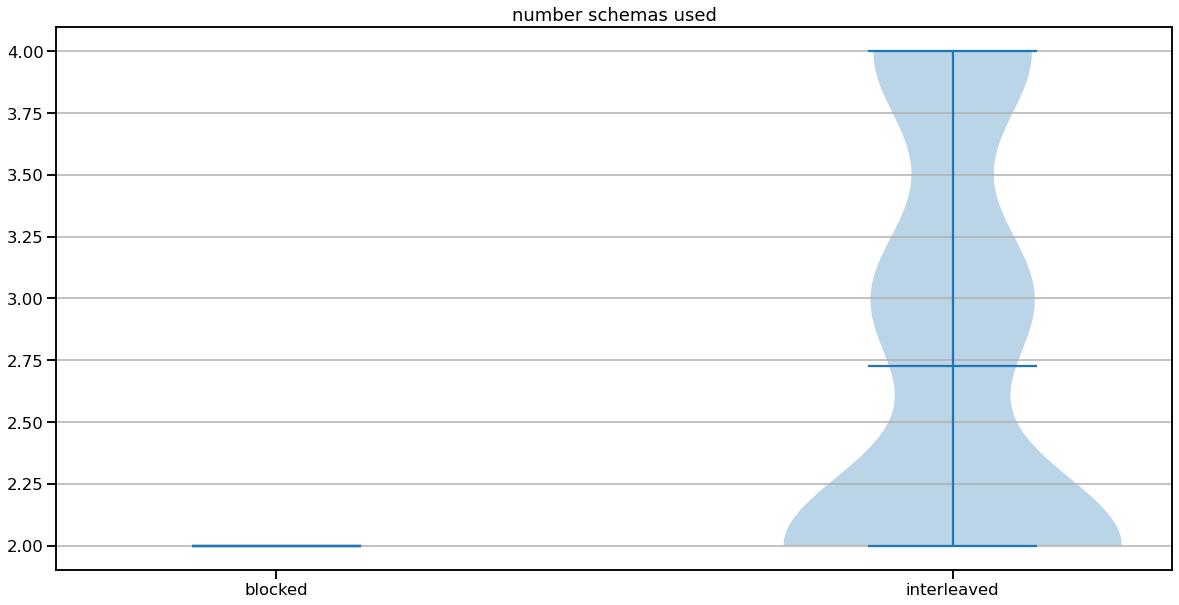

In [9]:
## count number of schemas used
def count_num_schemas(exp_data):
  """ 
  """
  L = []
  for curr_idx in range(len(condL)):
    num_schemas_used = [
      len(np.unique(exp_data[curr_idx][i]['zt'][:,:-1].flatten())
         ) for i in range(ns)
    ]
    L.append(num_schemas_used)
  nschemas = np.array(L)
  return nschemas


nschemasALL = count_num_schemas(exp_batch_data)-1
nschemas = nschemasALL[:2]

M = nschemas.mean(1)
S = nschemas.std(1)

plt.figure(figsize=(20,10))
ax = plt.gca()
ax.violinplot(nschemas.T,np.arange(len(nschemas)),showmeans=True)
ax.set_xticks(range(len(nschemas)))
ax.set_xticklabels(condL[:len(nschemas)])
plt.title('number schemas used')
ax.grid(True,axis='y')
# ax.set_title(param_str)
plt.savefig('figures/pdp2022/schcount-%s.png'%param_str)

### adj rand

In [10]:
def calc_adjrand(exp_batch_data):
  arscores = -np.ones([len(condL),ns,3])
  for curr_idx in range(len(condL)):
    for seed_idx in range(ns):
      for t_idx,tstep in enumerate([0,2,3]):
        arscores[curr_idx,seed_idx,t_idx] = adjusted_rand_score(
          exp_batch_data[curr_idx][seed_idx]['exp'][:,1],
          exp_batch_data[curr_idx][seed_idx]['zt'][:,tstep]
        )
  return arscores

arscores = calc_adjrand(exp_batch_data)
arscores.shape

(5, 150, 3)

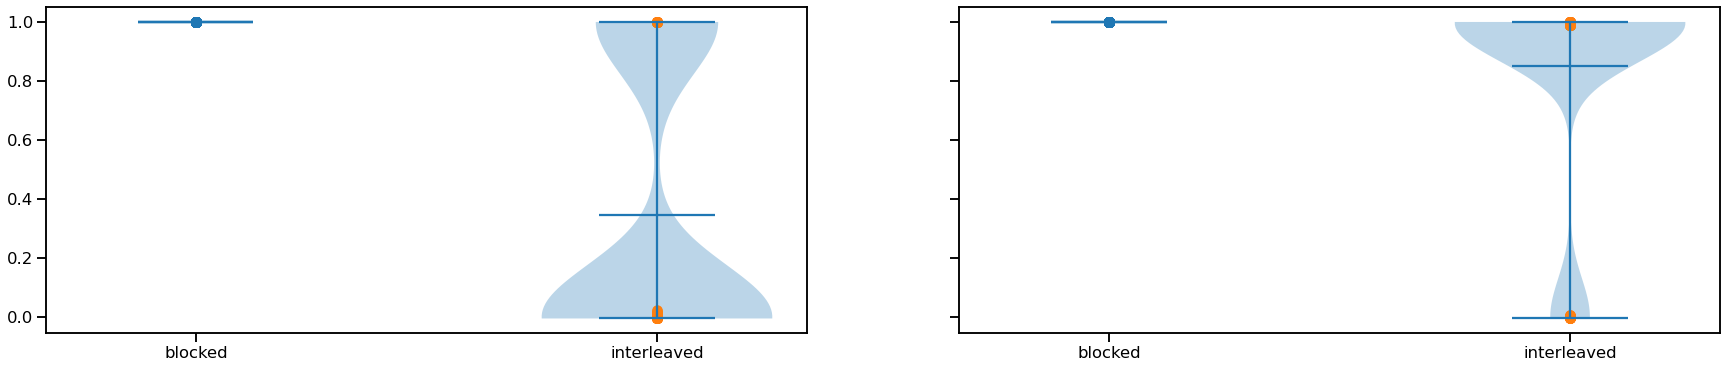

In [11]:
f,axar=plt.subplots(1,2,figsize=(30,6),sharey=True)
for t in range(2):
  ax=axar[t]
  ax.violinplot(arscores[:2,:,t+1].T,showextrema=1,showmeans=1)
  for c in range(2):
    ax.scatter(1+np.repeat(c,ns),arscores[c,:,t+1].T)
  ax.set_xticks(np.arange(1,3))
  ax.set_xticklabels(['blocked','interleaved'])
#   ax.set_title(['0','2','3'][t])
# plt.savefig(figdir+'adjrand')
# f.suptitle('adjusted rand',fontsize=30)
plt.savefig('figures/pdp2022/BIadjrand-%s.png'%param_str)

In [12]:
assert False

AssertionError: 

# analysis of model state

In [ ]:
curr_idx = 0
seed_idx = 1
## 
prior = unpack_data(exp_batch_data,
        dtype='prior')[curr_idx][seed_idx]
like = unpack_data(exp_batch_data,
        dtype='like')[curr_idx][seed_idx]
post = unpack_data(exp_batch_data,
        dtype='post')[curr_idx][seed_idx]
post.shape

### infered schema

In [ ]:
curr = 0
for seed in range(20):
  print('seed',seed)
  zt = exp_batch_data[curr][seed]['zt']
  st = exp_batch_data[curr][seed]['exp']

  prior = unpack_data(exp_batch_data,
          dtype='prior')[curr][seed] # trial,tstep,sch
  like = unpack_data(exp_batch_data,
          dtype='like')[curr][seed]
  post = unpack_data(exp_batch_data,
          dtype='post')[curr][seed]
  xth = exp_batch_data[curr][seed]['xth'].argmax(-1)


  for i in np.arange(83):
#   for i in np.arange(100):
#   for i in np.arange(5):
    
    print("t%.2i"%i,'z_h=',zt[i],'st=',st[i],'xth=',xth[i]
  #        post[i,:,1],
  #        post[i,:,2]
         )

# posterior, likelihood, prior

In [ ]:
def plt_prdata(dtype='post',schL=[0,1],curr_idx=0,seed_idx=0):
  """ 
  plots probability data (post,prior,like) 
  of at most 3 timesteps of 4 schemas
  NB single seed
  """
  # load data
  prdata = unpack_data(exp_batch_data,
          dtype=dtype)[curr_idx][seed_idx]
  # setup plots
  f,axar = plt.subplots(3,4,figsize=(20,10),sharex=True,sharey=True)
  # loop over timesteps and schema
  for ti,tstep in enumerate([0,2,3]):
    for si,sch in enumerate(schL):
      axar[0,si].set_title('sch%i'%sch)
      ax = axar[ti,si]
      # plot
      ax.plot(prdata[:,tstep,sch])
      for k in np.arange(0,200,40):
        ax.axvline(k,c='k',lw=0.5)
    axar[ti,0].set_ylabel('tstep%i'%tstep)
  title = '%s-%s'%(dtype,param_str)
  plt.suptitle(title)
  plt.savefig(figdir+'%s.png'%dtype)



In [ ]:
curr_idx=1
seed_idx=0
nsch = len(np.unique(exp_batch_data[curr_idx][seed_idx]['zt']))-1
print(nsch)
schL = [0,1]
plt_prdata('prior',schL,curr_idx,seed_idx)

In [ ]:
plt_prdata('post',schL,curr_idx,seed_idx)

In [ ]:
plt_prdata('like',schL,curr_idx,seed_idx)

In [ ]:
def get_bad_seed(exp_batch_data,max_splits=10):
  bad_seed_L = []
  for curr_idx in range(5):
    for seed_idx in range(ns):
      max_sch = np.max(exp_batch_data[curr_idx][seed_idx]['zt'])
      if max_sch>max_splits:
        bad_seed_L.append(seed_idx)
  return list(set(bad_seed_L))
# get_bad_seed(exp_batch_data,max_splits=10)

### adjusted rand score

# inspect splitting

In [ ]:
curr_idx,seed_idx=0,5
print('zt\n',exp_batch_data[curr_idx][seed_idx]['zt'][:3])
for k in ['post','prior','like']:
  print(k)
  print(exp_batch_data[curr_idx][seed_idx][k][:2,:,:5])
exp_batch_data[curr_idx][seed_idx][k].shape

# inspect prediction

In [ ]:
curr_idx,seed_idx=1,1
exp_batch_data[curr_idx][seed_idx]['xth'].argmax(-1)


In [ ]:
curr_idx,seed_idx=0,5
print('zt\n',exp_batch_data[curr_idx][seed_idx]['zt'][:3])
for k in ['xth']:
  print(k)
  print(exp_batch_data[curr_idx][seed_idx][k][:2,:,:5])
exp_batch_data[curr_idx][seed_idx][k].shape